<a href="https://colab.research.google.com/github/MayaHayat/Machine_Learning_FinalProject/blob/main/FInancial_sentiment_FInalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy


%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

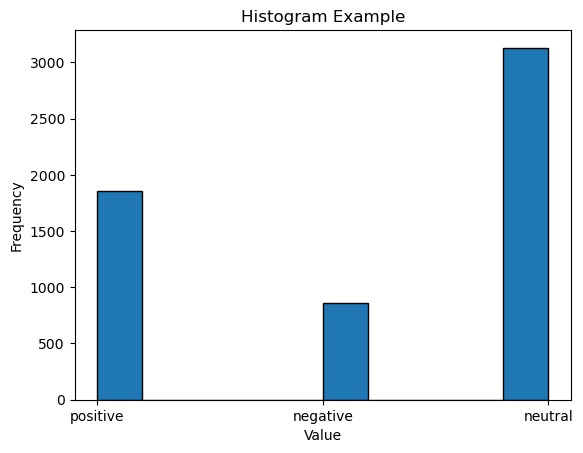

In [3]:
plt.hist(df['Sentiment'], bins=10, edgecolor='black')

# Add titles and labels
plt.title('Histogram Example')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

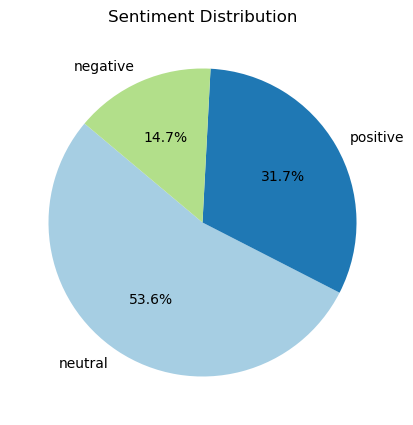

In [4]:
sentiment_counts = df['Sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(sentiment_counts))))

# Add title
plt.title('Sentiment Distribution')

# Show the plot
plt.show()

Note that the Neutral data is more than 50% of the total data which causes to the data to be extremely unbalanced!

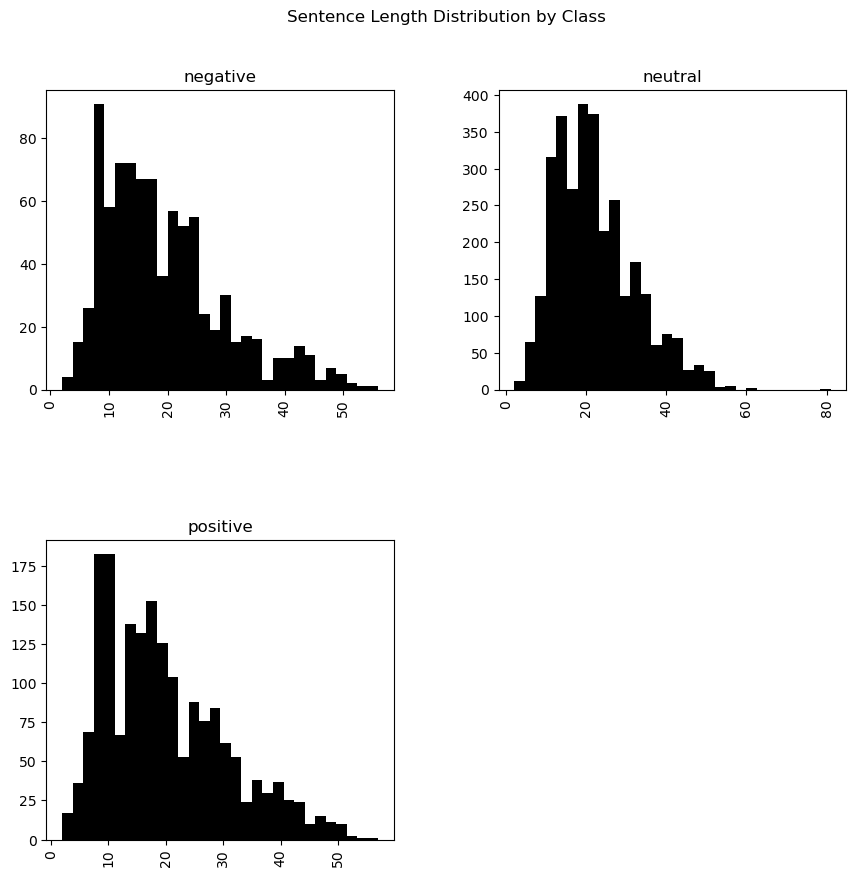

In [5]:
df['Sentence_length'] = df['Sentence'].apply(lambda x: len(x.split()))

# Plot sentence length distribution
df['Sentence_length'].hist(by=df['Sentiment'], bins=30, figsize=(10, 10),color='black')
plt.suptitle('Sentence Length Distribution by Class')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

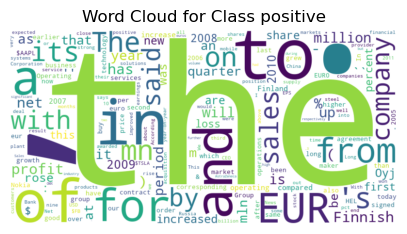

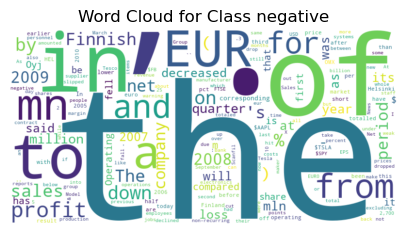

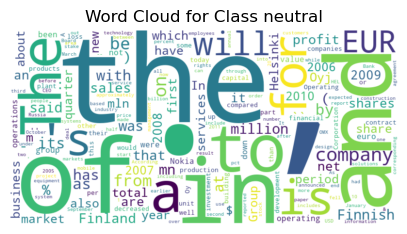

In [6]:
from collections import Counter
from wordcloud import WordCloud

def plot_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data)
    plt.figure(figsize=(5, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

for label in df['Sentiment'].unique():
    words = ' '.join(df[df['Sentiment'] == label]['Sentence']).split()
    word_freq = Counter(words)
    plot_wordcloud(word_freq, f'Word Cloud for Class {label}')

In [7]:
df.dropna(inplace=True) #Drop rows that contain null values just in case
df['Sentiment'] = df['Sentiment'].map({'positive':1,'negative':-1,'neutral':0})
df

Sentence  Sentiment  \
0     The GeoSolutions technology will leverage Bene...          1   
1     $ESI on lows, down $1.50 to $2.50 BK a real po...         -1   
2     For the last quarter of 2010 , Componenta 's n...          1   
3     According to the Finnish-Russian Chamber of Co...          0   
4     The Swedish buyout firm has sold its remaining...          0   
...                                                 ...        ...   
5837  RISING costs have forced packaging producer Hu...         -1   
5838  Nordic Walking was first used as a summer trai...          0   
5839  According shipping company Viking Line , the E...          0   
5840  In the building and home improvement trade , s...          0   
5841  HELSINKI AFX - KCI Konecranes said it has won ...          1   

      Sentence_length  
0                  32  
1                  11  
2                  39  
3                  20  
4                  23  
...               ...  
5837               17  
5838               14  
5839               16  
5840               18  
5841               27  

[5842 rows x 3 columns]

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Features and target variable
X = df['Sentence']
y = df['Sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit on training data
X_train_transformed = vectorizer.fit_transform(X_train)

# Transform test data using the same vectorizer
X_test_transformed = vectorizer.transform(X_test)

# Running Algorithms disregarding the classes imbalance

## KNN

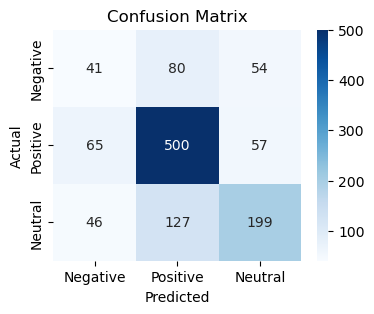

Accuracy: 0.6330196749358425
Classification Report:
               precision    recall  f1-score   support

          -1       0.27      0.23      0.25       175
           0       0.71      0.80      0.75       622
           1       0.64      0.53      0.58       372

    accuracy                           0.63      1169
   macro avg       0.54      0.52      0.53      1169
weighted avg       0.62      0.63      0.62      1169



In [9]:
knn = KNeighborsClassifier()

# Fit the classifier on the training data
knn.fit(X_train_transformed, y_train)


# Make predictions on the test set
y_pred = knn.predict(X_test_transformed)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

## Decision Tree Classification

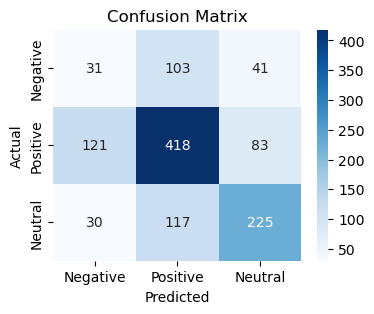

Accuracy: 0.5765611633875107
Classification Report:
               precision    recall  f1-score   support

          -1       0.17      0.18      0.17       175
           0       0.66      0.67      0.66       622
           1       0.64      0.60      0.62       372

    accuracy                           0.58      1169
   macro avg       0.49      0.48      0.49      1169
weighted avg       0.58      0.58      0.58      1169



In [10]:
# Initialize Decision Tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier on the training data
clf.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_transformed)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

## SVM

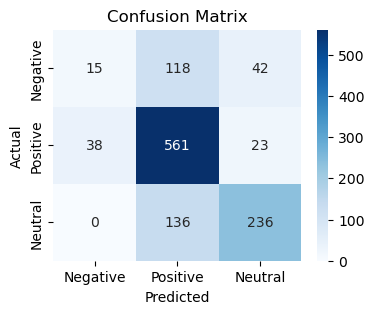

Accuracy: 0.6946107784431138
Classification Report:
               precision    recall  f1-score   support

          -1       0.28      0.09      0.13       175
           0       0.69      0.90      0.78       622
           1       0.78      0.63      0.70       372

    accuracy                           0.69      1169
   macro avg       0.59      0.54      0.54      1169
weighted avg       0.66      0.69      0.66      1169



In [11]:

# Initialize SVM classifier
clf = SVC()

# Fit the classifier on the training data
clf.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_transformed)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

## Logistic Regression

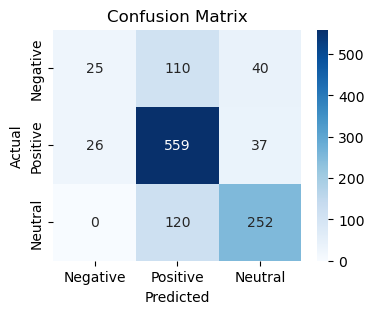

Accuracy: 0.7151411462788708
Classification Report:
               precision    recall  f1-score   support

          -1       0.49      0.14      0.22       175
           0       0.71      0.90      0.79       622
           1       0.77      0.68      0.72       372

    accuracy                           0.72      1169
   macro avg       0.65      0.57      0.58      1169
weighted avg       0.69      0.72      0.68      1169



In [12]:
# Initialize Logistic Regression classifier
log_reg = LogisticRegression()

# Fit the classifier on the training data
log_reg.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_transformed)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

As we can see the accuracy is fairly high here however the precision and recall are very low in the 'Negative' sentences compared to the Positive and Neutral.
As we know, the main reason for such results are usually imbalanced data (which of course perfectly matches with what we saw in the data distribution).

In order to deal with the classes imbalance we have 2 options:
* Downsampling
* Oversampling

# Downsampling

**Cluster-Based Undersampling:**
* Cluster the majority class into several clusters.
* Randomly select one instance from each cluster to form the undersampled dataset.
* This preserves class diversity better than random undersampling.

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Assume df is your DataFrame and has columns 'Sentence' and 'Sentiment'

# Features and target variable
X = df['Sentence']
y = df['Sentiment']

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Transform data using the TF-IDF Vectorizer
X_transformed = vectorizer.fit_transform(X)

# Separate the data into classes
neutral_mask = y == 0
positive_mask = y == 1
negative_mask = y == -1

# Perform clustering on 'Neutral' class
neutral_kmeans = KMeans(n_clusters=1000, random_state=42, n_init='auto').fit(X_transformed[neutral_mask])
neutral_clusters = pd.Series(neutral_kmeans.labels_)

# Perform clustering on 'Positive' class
positive_kmeans = KMeans(n_clusters=1000, random_state=42, n_init='auto').fit(X_transformed[positive_mask])
positive_clusters = pd.Series(positive_kmeans.labels_)

# Sample one instance from each cluster
neutral_indices = neutral_clusters.groupby(neutral_clusters).apply(lambda x: x.sample(1, random_state=42)).index.get_level_values(1)
positive_indices = positive_clusters.groupby(positive_clusters).apply(lambda x: x.sample(1, random_state=42)).index.get_level_values(1)

# Create a new DataFrame with the undersampled data
neutral_undersampled_df = df[neutral_mask].iloc[neutral_indices]
positive_undersampled_df = df[positive_mask].iloc[positive_indices]
negative_df = df[negative_mask]

undersampled_df = pd.concat([neutral_undersampled_df, positive_undersampled_df, negative_df])

undersampled_df.reset_index(drop=True, inplace=True)
# Shuffle the DataFrame
undersampled_df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [14]:
undersampled_df.to_csv('undersampled_data.csv', index=False)
undersampled_df

Sentence  Sentiment  \
0     Demand was brisk as expected and order levels ...          1   
1     In September 2010 , the Finnish group agreed t...          1   
2     This organization will assume the responsibili...          0   
3     $CNP Sell Short Position on CNP,...Closed for ...          1   
4     Finnish glass technology group Glaston Corpora...          0   
...                                                 ...        ...   
2855  The solutions will be used for upgrading the n...          1   
2856  In Q1 of 2010 , Bank of +àland 's net interest...          1   
2857           Growth is expected to continue in 2008 .          1   
2858  South African Sappi will become the largest fo...          1   
2859  Previously , Grimaldi held a 46.43 pct stake i...          0   

      Sentence_length  
0                  12  
1                  29  
2                  11  
3                  12  
4                  39  
...               ...  
2855               20  
2856               22  
2857                8  
2858               29  
2859               21  

[2860 rows x 3 columns]

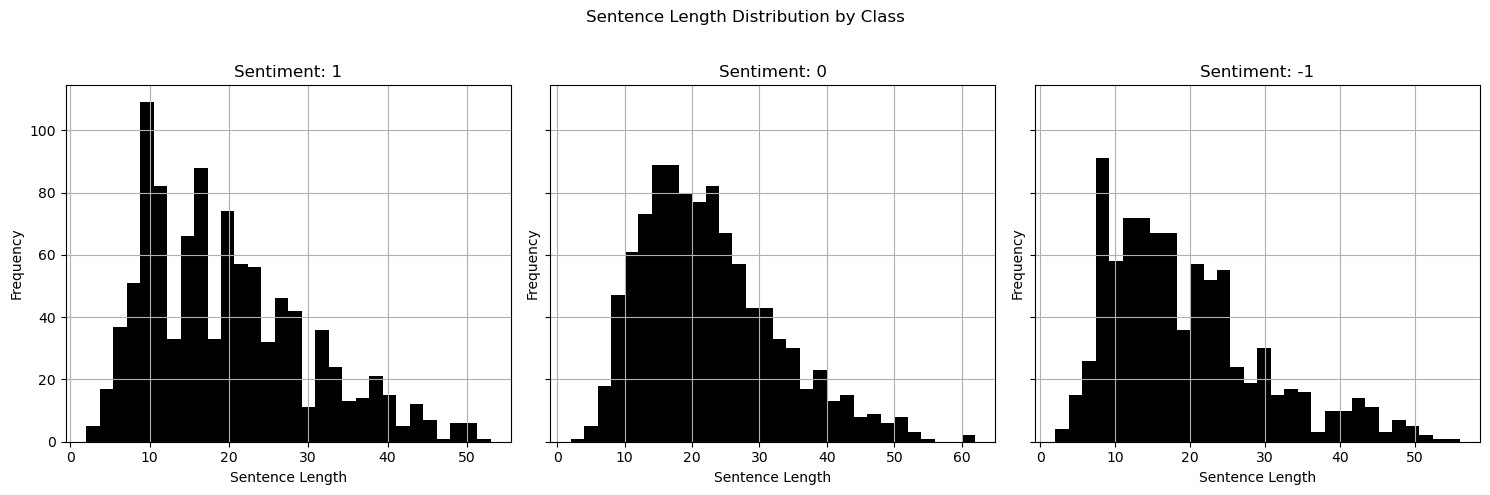

In [15]:
undersampled_df['Sentence_length'] = undersampled_df['Sentence'].apply(lambda x: len(x.split()))

# Get the unique sentiments
unique_sentiments = undersampled_df['Sentiment'].unique()

# Create subplots
fig, axes = plt.subplots(1, len(unique_sentiments), figsize=(15, 5), sharey=True)

# Plot each sentiment's histogram
for ax, sentiment in zip(axes, unique_sentiments):
    subset = undersampled_df[undersampled_df['Sentiment'] == sentiment]
    subset['Sentence_length'].hist(bins=30, ax=ax, color='black')
    ax.set_title(f'Sentiment: {sentiment}')
    ax.set_xlabel('Sentence Length')
    ax.set_ylabel('Frequency')

# Adjust layout and show plot
plt.suptitle('Sentence Length Distribution by Class')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the suptitle
plt.show()


Note that the length distrubution of the sentences in both downsampled groups remains approximetly the same.

Let's run the algorithms now to see whether there's a change in recall and precision (especially of the Negative class)

In [16]:
# Note the usage of 'undersampled_df' instead of the normal df
X = undersampled_df['Sentence']
y = undersampled_df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()

X_train_transformed = vectorizer.fit_transform(X_train)

# Transform test data using the same vectorizer
X_test_transformed = vectorizer.transform(X_test)

### KNN

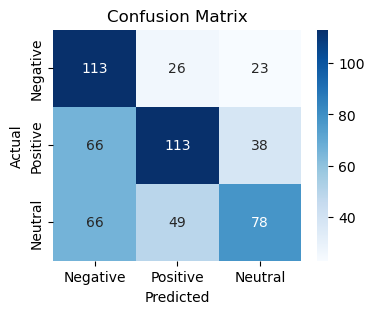

Accuracy: 0.5314685314685315
Classification Report:
               precision    recall  f1-score   support

          -1       0.46      0.70      0.56       162
           0       0.60      0.52      0.56       217
           1       0.56      0.40      0.47       193

    accuracy                           0.53       572
   macro avg       0.54      0.54      0.53       572
weighted avg       0.55      0.53      0.53       572



In [17]:
knn = KNeighborsClassifier()
knn.fit(X_train_transformed, y_train)

y_pred = knn.predict(X_test_transformed)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

### Decision Tree Classification

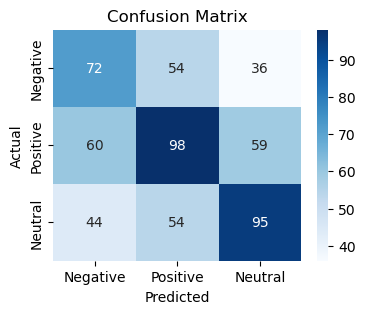

Accuracy: 0.4632867132867133
Classification Report:
               precision    recall  f1-score   support

          -1       0.41      0.44      0.43       162
           0       0.48      0.45      0.46       217
           1       0.50      0.49      0.50       193

    accuracy                           0.46       572
   macro avg       0.46      0.46      0.46       572
weighted avg       0.47      0.46      0.46       572



In [18]:
clf = DecisionTreeClassifier()
clf.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

### SVM

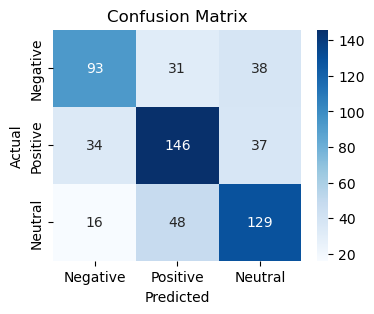

Accuracy: 0.6433566433566433
Classification Report:
               precision    recall  f1-score   support

          -1       0.65      0.57      0.61       162
           0       0.65      0.67      0.66       217
           1       0.63      0.67      0.65       193

    accuracy                           0.64       572
   macro avg       0.64      0.64      0.64       572
weighted avg       0.64      0.64      0.64       572



In [19]:
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

### Logistic Regression

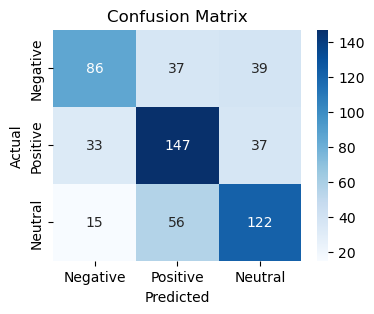

Accuracy: 0.6206293706293706
Classification Report:
               precision    recall  f1-score   support

          -1       0.64      0.53      0.58       162
           0       0.61      0.68      0.64       217
           1       0.62      0.63      0.62       193

    accuracy                           0.62       572
   macro avg       0.62      0.61      0.62       572
weighted avg       0.62      0.62      0.62       572



In [20]:
log_reg = LogisticRegression()
log_reg.fit(X_train_transformed, y_train)

y_pred = log_reg.predict(X_test_transformed)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

As we can see the precision and recall for the Negative class is much higher, although the accuracy decreased quite a lot we know that our model has probably learnt better andd didn't just make random guesses (and could still be getting high accuracy as the Natural class accounts for over 50% of the data).

## Preprocessing the Downsampled Data

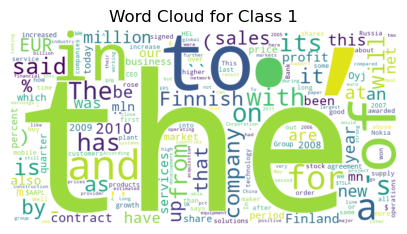

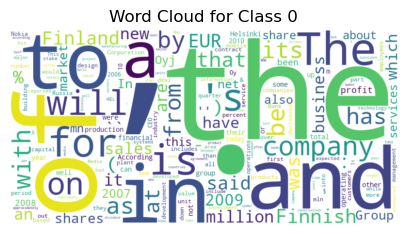

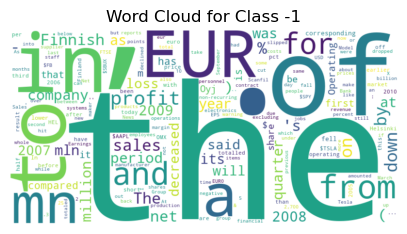

In [21]:
for label in undersampled_df['Sentiment'].unique():
    words = ' '.join(undersampled_df[undersampled_df['Sentiment'] == label]['Sentence']).split()
    word_freq = Counter(words)
    plot_wordcloud(word_freq, f'Word Cloud for Class {label}')

As we can clearly see, the words that are found the most (larger words) are irrelevant (stopwords), therefore we will have to remove them so the more effective words contribute more.

In [22]:
undersampled_df = pd.read_csv('undersampled_data.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


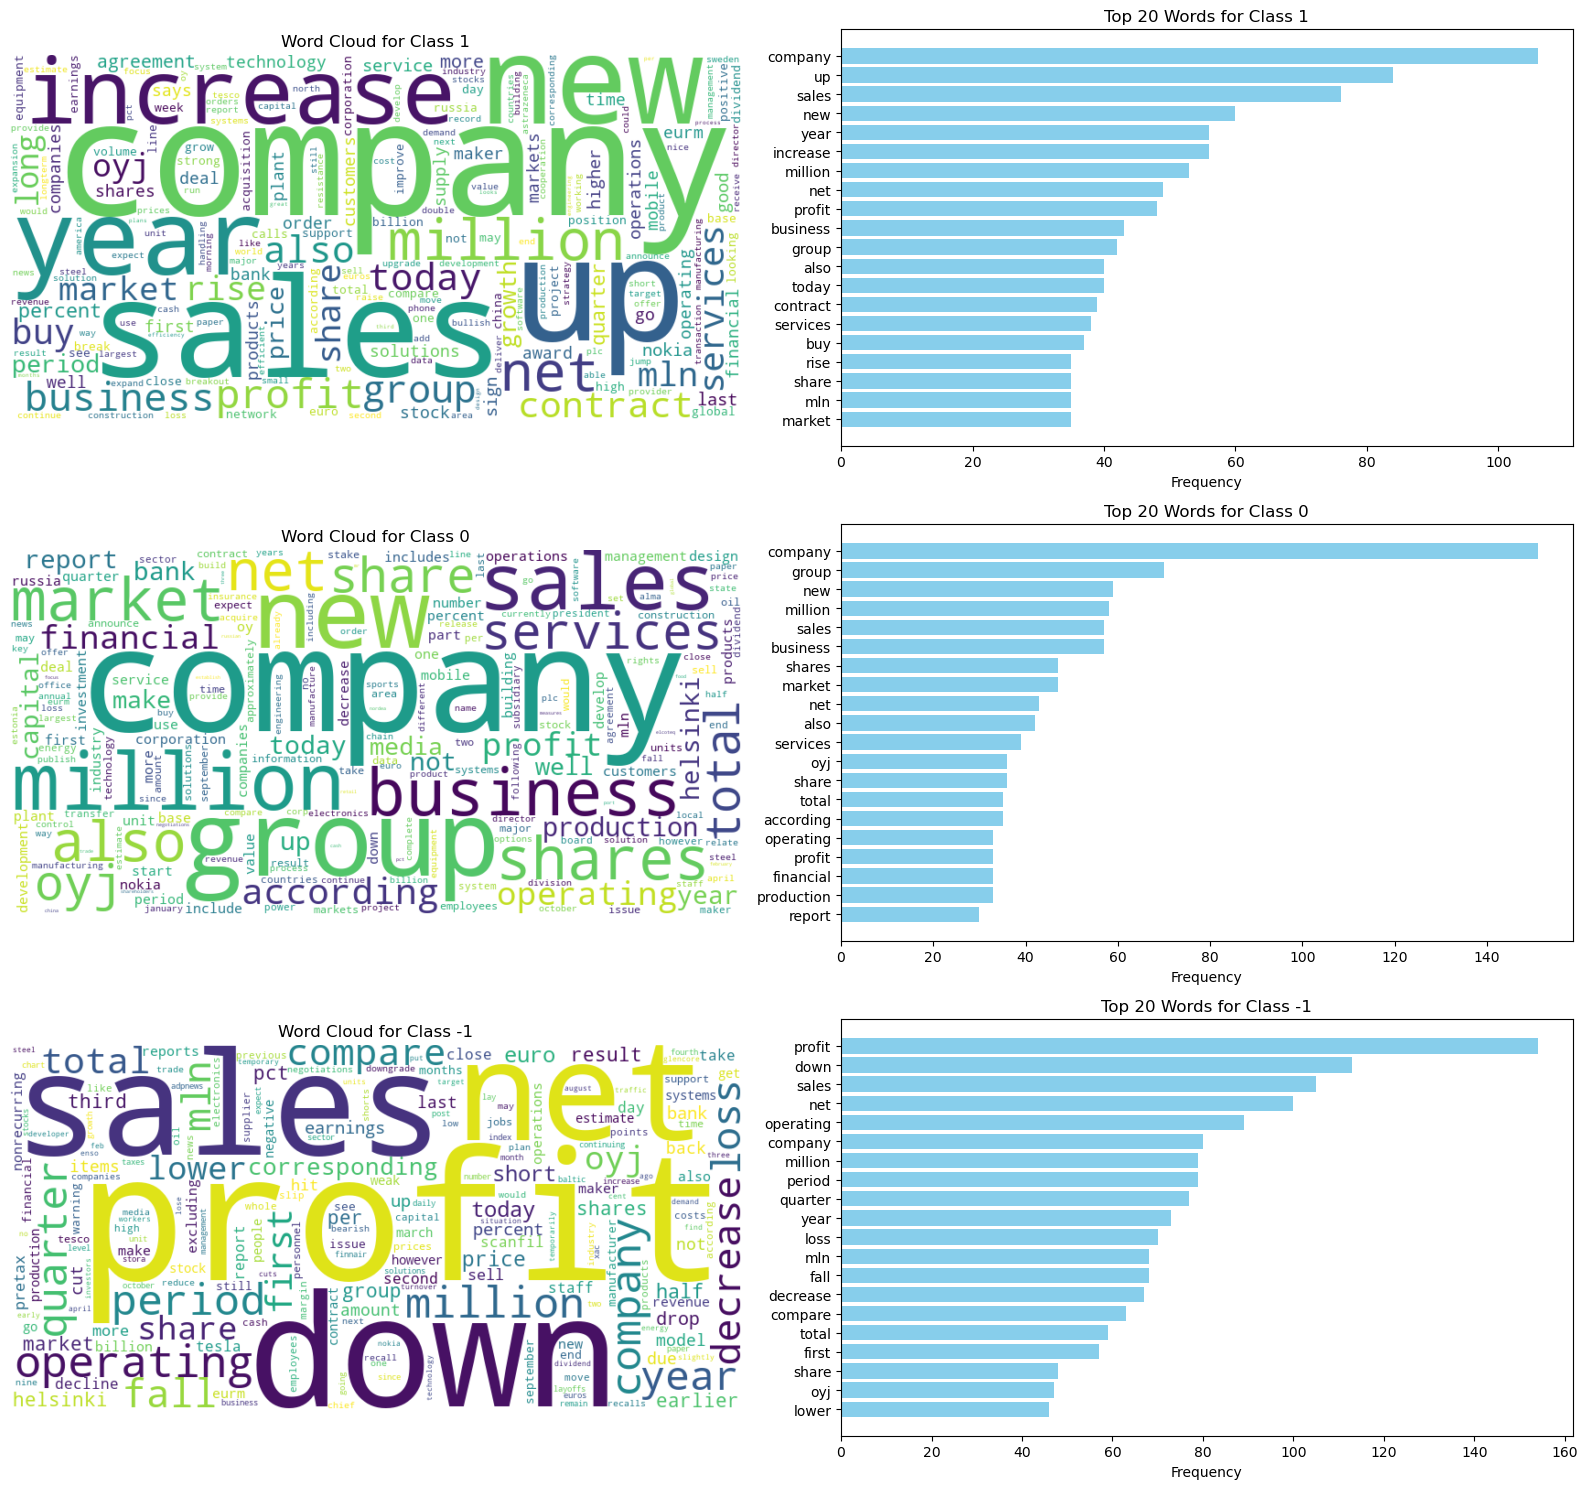

In [23]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Define stopwords and additional irrelevant words
exclude_words = {"up", "down", "few", "more", "no", "nor", "not"}
stop_words = set(stopwords.words('english')).union({"said", "EU", "mn", '$', '%', "eur", "finnish", "finland", '(', ')'})
stop_words -= exclude_words

def remove_stopwords(sentence):
    words = word_tokenize(sentence)
    filtered_sentence = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_sentence)

def remove_irrelevants(sentence):
    # Remove URLs
    sentence = re.compile(r'https?://\S+|www\.\S+').sub('', sentence)
    # Convert to lowercase
    sentence = sentence.lower()
    # Remove non-alphabetic characters (optional)
    sentence = re.sub(r'[^a-z\s]', '', sentence)
    return sentence

def preprocess_sentence(sentence):
    if isinstance(sentence, str):  # Only process strings
        sentence = remove_irrelevants(sentence)
        sentence = remove_stopwords(sentence)
        sentence = convert_past_to_present(sentence)  # Convert verbs to present tense
    return sentence

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

def convert_past_to_present(sentence):
    doc = nlp(sentence)
    present_sentence = []

    for token in doc:
        if token.pos_ == 'VERB':
            # Get the lemma (base form of the verb) which often is the present tense form
            lemma = token.lemma_
            if token.tag_ in ['VBD', 'VBN']:  # Past tense and past participle tags
                present_sentence.append(lemma)
            else:
                present_sentence.append(token.text)
        else:
            present_sentence.append(token.text)

    return " ".join(present_sentence)

# Assuming df is your DataFrame and it contains 'Sentence' and 'Sentiment' columns
undersampled_df['Sentence'] = undersampled_df['Sentence'].astype(str).apply(preprocess_sentence)

# Function to plot word cloud (you need to have wordcloud and matplotlib installed)
def plot_wordcloud(word_freq, title, ax):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title)
    ax.axis('off')

# Function to plot top 20 words bar chart
def plot_top_words(word_freq, title, ax):
    top_words = word_freq.most_common(20)
    words, counts = zip(*top_words)
    ax.barh(words, counts, color='skyblue')
    ax.set_xlabel('Frequency')
    ax.set_title(title)
    ax.invert_yaxis()  # Invert y-axis to have the most frequent words on top

# Number of unique sentiments
unique_labels = undersampled_df['Sentiment'].unique()
num_labels = len(unique_labels)

# Create subplots: 2 columns (word clouds and bar charts) and as many rows as unique labels
fig, axes = plt.subplots(nrows=num_labels, ncols=2, figsize=(16, 5 * num_labels))

for idx, label in enumerate(unique_labels):
    words = ' '.join(undersampled_df[undersampled_df['Sentiment'] == label]['Sentence']).split()
    word_freq = Counter(words)

    # Plot word cloud
    plot_wordcloud(word_freq, f'Word Cloud for Class {label}', axes[idx, 0])

    # Plot top 20 words bar chart
    plot_top_words(word_freq, f'Top 20 Words for Class {label}', axes[idx, 1])

plt.tight_layout()
plt.show()


In [24]:
undersampled_df.to_csv('downsampled_data_preprocessed.csv', index=False)

In [25]:
undersampled_df

Sentence  Sentiment  \
0          demand brisk expect order levels remain high          1   
1     september group agree buy danish company rise ...          1   
2     organization assume responsibility operations ...          0   
3                   sell short position cnpclose profit          1   
4     glass technology group glaston corporation hel...          0   
...                                                 ...        ...   
2855  solutions use upgrading networks russian diffe...          1   
2856             bank land net interest income increase          1   
2857                             growth expect continue          1   
2858  south african sappi become largest foreign for...          1   
2859  previously grimaldi hold pct stake company fol...          0   

      Sentence_length  
0                  12  
1                  29  
2                  11  
3                  12  
4                  39  
...               ...  
2855               20  
2856               22  
2857                8  
2858               29  
2859               21  

[2860 rows x 3 columns]

In [26]:
X = undersampled_df['Sentence']
y = undersampled_df['Sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit on training data
X_train_transformed = vectorizer.fit_transform(X_train)

# Transform test data using the same vectorizer
X_test_transformed = vectorizer.transform(X_test)

### KNN

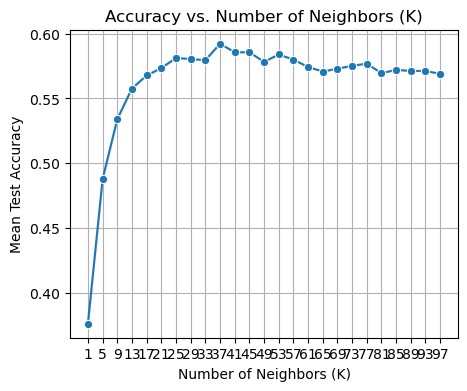

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


# Define the parameter grid for GridSearchCV with n_neighbors up to 100 in steps of 4
param_grid = {
    'n_neighbors': list(range(1, 101, 4)),  # Testing from 1 to 100 in steps of 4
    'algorithm': ['auto','brute']  # Different algorithms to test
}

# Initialize GridSearchCV with KNN model and parameter grid
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search.fit(X_train_transformed, y_train)

# Extract results for plotting
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']
param_n_neighbors = results['param_n_neighbors']

# Initialize GridSearchCV with KNN model and parameter grid
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search.fit(X_train_transformed, y_train)

# Extract results for plotting
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']
# Plot accuracy vs. n_neighbors
plt.figure(figsize=(5, 4))
sns.lineplot(x=param_n_neighbors, y=mean_test_scores, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Test Accuracy')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.grid(True)
plt.xticks(np.arange(min(param_n_neighbors), max(param_n_neighbors)+1, 4))  # Set x-ticks to match steps
plt.show()


Best Parameters: 43, auto
Best Cross-Validation Accuracy: 0.5905
Classification Report:
               precision    recall  f1-score   support

          -1       0.54      0.69      0.60       162
           0       0.65      0.44      0.52       217
           1       0.56      0.63      0.59       193

    accuracy                           0.57       572
   macro avg       0.58      0.59      0.57       572
weighted avg       0.59      0.57      0.57       572



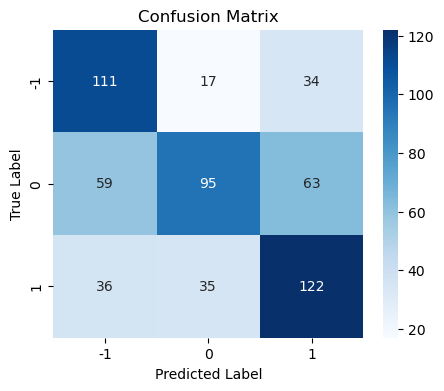

In [28]:
#
param_grid = {
    'n_neighbors': [43, 45, 47],  # Range of K values to test
    'algorithm': ['auto','brute']  # Different algorithms to test
}

# Initialize GridSearchCV with KNN model and parameter grid
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search.fit(X_train_transformed, y_train)

# Get the best K value and the corresponding accuracy
best_k = grid_search.best_params_['n_neighbors']
best_algorithm = grid_search.best_params_['algorithm']
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_k}, {best_algorithm}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.4f}")

# Evaluate the best model on the test set
best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(X_test_transformed)

print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Decision Tree Classifier

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
500 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\USER\anaconda3\Lib\site-packages\s

Best Parameters: {'max_depth': 80, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 80}
Cross-validation results saved to cross_validation_results.csv
Accuracy: 0.5927
Classification Report:
               precision    recall  f1-score   support

          -1       0.67      0.56      0.61       162
           0       0.53      0.73      0.61       217
           1       0.66      0.47      0.55       193

    accuracy                           0.59       572
   macro avg       0.62      0.59      0.59       572
weighted avg       0.61      0.59      0.59       572



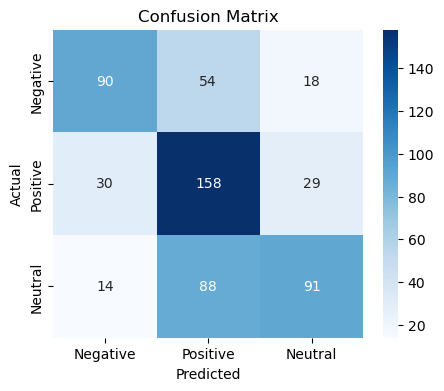

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


clf = DecisionTreeClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [60, 65, 70, 75, 80],
    'min_samples_split': [60, 65, 70, 75, 80],
    'min_samples_leaf': [1, 2, 5, 7],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on training data
grid_search.fit(X_train_transformed, y_train)

# Get the best estimator
best_clf = grid_search.best_estimator_

# Print the parameters of the best estimator
print("Best Parameters:", grid_search.best_params_)

# Perform cross-validation with the best estimator
cv_results = cross_val_score(best_clf, X_train_transformed, y_train, cv=5, scoring='accuracy')

# Collect cross-validation results
cv_data = {
    'Fold': range(1, len(cv_results) + 1),
    'Accuracy': cv_results
}

# Convert to DataFrame
df_cv_results = pd.DataFrame(cv_data)

# Save to CSV
df_cv_results.to_csv('cross_validation_results.csv', index=False)
print("Cross-validation results saved to cross_validation_results.csv")

# Make predictions on the test data
y_pred = best_clf.predict(X_test_transformed)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### SVM

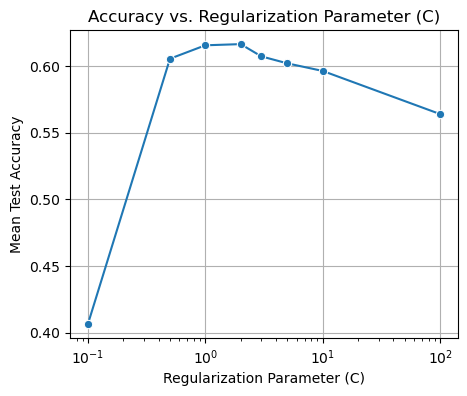

              precision    recall  f1-score   support

          -1       0.63      0.64      0.63       162
           0       0.61      0.59      0.60       217
           1       0.63      0.66      0.64       193

    accuracy                           0.62       572
   macro avg       0.62      0.63      0.63       572
weighted avg       0.62      0.62      0.62       572



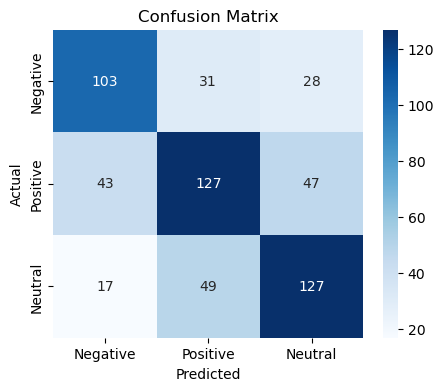

In [30]:
param_grid = {
    'C': [0.1, 0.5, 1, 2, 3, 5, 10, 100],  # Regularization parameter
    'kernel': ['linear']  # Kernel type to use
}

# Initialize GridSearchCV with SVM model and parameter grid
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_transformed, y_train)

# Extract the results into a DataFrame
results = grid_search.cv_results_

# Plot accuracy vs. regularization parameter (C)
plt.figure(figsize=(5, 4))
sns.lineplot(x=results['param_C'], y=results['mean_test_score'], marker='o')
plt.xscale('log')  # Log scale for better visualization
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Mean Test Accuracy')
plt.title('Accuracy vs. Regularization Parameter (C)')
plt.grid(True)
plt.show()

# Get the best estimator and evaluate it
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_transformed)
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Logistic Regression

Best Parameters: {'max_iter': 100}
Best Cross-Validation Accuracy: 0.6136
Classification Report:
               precision    recall  f1-score   support

          -1       0.66      0.59      0.63       162
           0       0.62      0.64      0.63       217
           1       0.61      0.65      0.63       193

    accuracy                           0.63       572
   macro avg       0.63      0.63      0.63       572
weighted avg       0.63      0.63      0.63       572



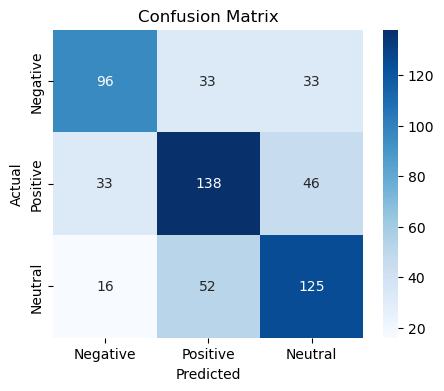

In [31]:
# Define the parameter grid for GridSearchCV
param_grid = [
    {
    'max_iter' : [100, 1000, 2500, 5000]
    }
]

# Initialize GridSearchCV with Logistic Regression model and parameter grid
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search.fit(X_train_transformed, y_train)

# Get the best parameters and the corresponding accuracy

best_accuracy = grid_search.best_score_

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.4f}")

# Evaluate the best model on the test set
best_logreg_model = grid_search.best_estimator_
y_pred = best_logreg_model.predict(X_test_transformed)

print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Fold 1 - Best Parameters: {'max_iter': 100}
Fold 1 - Best Cross-Validation Accuracy: 0.6062

Fold 2 - Best Parameters: {'max_iter': 100}
Fold 2 - Best Cross-Validation Accuracy: 0.6254

Fold 3 - Best Parameters: {'max_iter': 100}
Fold 3 - Best Cross-Validation Accuracy: 0.6189

Fold 4 - Best Parameters: {'max_iter': 100}
Fold 4 - Best Cross-Validation Accuracy: 0.6215

Fold 5 - Best Parameters: {'max_iter': 100}
Fold 5 - Best Cross-Validation Accuracy: 0.6093

Average Cross-Validation Accuracy: 0.6163
Aggregated Classification Report:

Class -1:
  precision: 0.6788
  recall: 0.5734
  f1-score: 0.6215
  support: 172.0000
Class 0:
  precision: 0.5691
  recall: 0.6314
  f1-score: 0.5982
  support: 200.0000
Class 1:
  precision: 0.6349
  recall: 0.6506
  f1-score: 0.6423
  support: 200.0000
accuracy: 0.6206
Class macro avg:
  precision: 0.6276
  recall: 0.6185
  f1-score: 0.6207
  support: 572.0000
Class weighted avg:
  precision: 0.6263
  recall: 0.6206
  f1-score: 0.6212
  support: 572.0

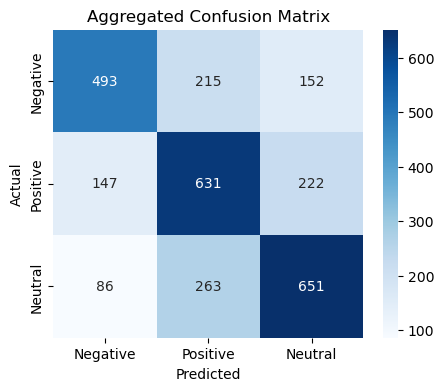

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

param_grid = {'max_iter': [100, 1000, 2500, 5000]}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

best_params_list = []
best_accuracies = []
all_classification_reports = []
all_conf_matrices = []

for train_index, test_index in kfold.split(X):
    # Split the data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    vectorizer = TfidfVectorizer()
    X_train_transformed = vectorizer.fit_transform(X_train)
    X_test_transformed = vectorizer.transform(X_test)

    # Initialize GridSearchCV
    grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

    # Fit GridSearchCV
    grid_search.fit(X_train_transformed, y_train)

    # Store the best parameters and accuracy
    best_params_list.append(grid_search.best_params_)
    best_accuracies.append(grid_search.best_score_)

    # Evaluate the best model on the test set
    best_logreg_model = grid_search.best_estimator_
    y_pred = best_logreg_model.predict(X_test_transformed)

    # Store classification report and confusion matrix
    all_classification_reports.append(classification_report(y_test, y_pred, output_dict=True))
    all_conf_matrices.append(confusion_matrix(y_test, y_pred))

# Print best parameters and accuracies
for i, (params, accuracy) in enumerate(zip(best_params_list, best_accuracies), 1):
    print(f"Fold {i} - Best Parameters: {params}")
    print(f"Fold {i} - Best Cross-Validation Accuracy: {accuracy:.4f}\n")

# Average cross-validation accuracy
average_accuracy = np.mean(best_accuracies)
print(f"Average Cross-Validation Accuracy: {average_accuracy:.4f}")

# Aggregate classification reports
def aggregate_classification_reports(reports):
    agg_report = {}
    for report in reports:
        for label, metrics in report.items():
            if isinstance(metrics, dict):  # Only process dictionary-type metrics
                if label not in agg_report:
                    agg_report[label] = {k: [] for k in metrics.keys()}
                for metric, value in metrics.items():
                    agg_report[label][metric].append(value)
            else:  # Process float-type metrics (e.g., accuracy)
                if label not in agg_report:
                    agg_report[label] = []
                agg_report[label].append(metrics)
    for label, metrics in agg_report.items():
        if isinstance(metrics, dict):
            for metric, values in metrics.items():
                agg_report[label][metric] = np.mean(values)
        else:
            agg_report[label] = np.mean(metrics)
    return agg_report

agg_classification_report = aggregate_classification_reports(all_classification_reports)
print("Aggregated Classification Report:\n")
for label, metrics in agg_classification_report.items():
    if isinstance(metrics, dict):
        print(f"Class {label}:")
        for metric, value in metrics.items():
            print(f"  {metric}: {value:.4f}")
    else:
        print(f"{label}: {metrics:.4f}")

# Sum confusion matrices
agg_conf_matrix = np.sum(all_conf_matrices, axis=0)

# Plot aggregated confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(agg_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Aggregated Confusion Matrix')
plt.show()


As we can see, Downsampling did improve the recall and precision of the Negative class, however the accuracy was greatly compromised (even though the learning is indeed more accurate).

# Upsampling

Another approach to balancing the dataset is upsampling. In order to do so, we will add more instances from another dataset called "Forex News Annotated Dataset for Sentiment Analysis". You can find it here at https://zenodo.org/records/7976208

In [33]:
df2 = pd.read_csv('sentiment_annotated_with_texts.csv')

In [34]:
df2

published_at  ticker true_sentiment  \
0     2023-01-12 07:47:00  EURCHF       Positive   
1     2023-01-12 10:34:00  EURCHF       Positive   
2     2023-01-12 11:40:00  EURCHF        Neutral   
3     2023-01-12 15:32:00  EURCHF       Positive   
4     2023-01-13 11:37:00  EURCHF       Positive   
...                   ...     ...            ...   
2286  2023-05-04 13:55:00  GBPUSD       Positive   
2287  2023-05-04 14:12:00  EURCHF       Negative   
2288  2023-05-04 14:17:00  EURUSD        Neutral   
2289  2023-05-04 15:00:00  GBPUSD       Positive   
2290  2023-05-04 15:10:00  USDJPY       Negative   

                                                  title  \
0     Euro to benefit from the ECBs pronounced hawki...   
1         EURCHF Trend higher may remain in place – ING   
2     Does a jump in EURCHF point to a break above 1...   
3     EURCHF could extend its advance back to levels...   
4     EURCHF to head higher towards 10130 and projec...   
...                                                 ...   
2286  GBPUSD holds steady near its highest level sin...   
2287  EURCHF to break below the 097 level – Credit S...   
2288  EURUSD Shortterm dips likely supported near 10...   
2289  GBPUSD Looking for an eventual final leg highe...   
2290  USDJPY breaks below 13400 as Wall Street exten...   

                      author  \
0     FXStreet Insights Team   
1     FXStreet Insights Team   
2     FXStreet Insights Team   
3     FXStreet Insights Team   
4     FXStreet Insights Team   
...                      ...   
2286         Haresh Menghani   
2287  FXStreet Insights Team   
2288  FXStreet Insights Team   
2289  FXStreet Insights Team   
2290           Matías Salord   

                                                    url     source  \
0     https://www.fxstreet.com/news/euro-to-benefit-...  FX Street   
1     https://www.fxstreet.com/news/eur-chf-trend-hi...  FX Street   
2     https://www.fxstreet.com/news/does-a-jump-in-e...  FX Street   
3     https://www.fxstreet.com/news/eur-chf-could-ex...  FX Street   
4     https://www.fxstreet.com/news/eur-chf-to-head-...  FX Street   
...                                                 ...        ...   
2286  https://www.fxstreet.com/news/gbp-usd-holds-st...  FX Street   
2287  https://www.fxstreet.com/news/eur-chf-to-break...  FX Street   
2288  https://www.fxstreet.com/news/eur-usd-short-te...  FX Street   
2289  https://www.fxstreet.com/news/gbp-usd-looking-...  FX Street   
2290  https://www.fxstreet.com/news/usd-jpy-breaks-b...  FX Street   

                                                   text finbert_sentiment  \
0     The Euro was able to appreciate particularly s...          Positive   
1     EUR/CHF yesterday broke above 1.00. Economists...          Positive   
2     EUR/CHF vaults parity for the first time since...           Neutral   
3     EUR/CHF climbs back above parity. Economists a...          Positive   
4     EUR/CHF has broken out above the sideways rang...          Positive   
...                                                 ...               ...   
2286  The GBP/USD pair enters a bullish consolidatio...          Positive   
2287  EUR/CHF has turned back lower over the past co...          Positive   
2288  The European Central Bank (ECB)downshifted to ...          Negative   
2289  Economists at Credit Suisse discuss GBP outloo...           Neutral   
2290  The USD/JPY has broken lower and tumbled to 13...          Negative   

      finbert_sent_score  
0                   0.85  
1                   0.51  
2                   0.37  
3                   0.64  
4                   0.83  
...                  ...  
2286                0.63  
2287                0.47  
2288               -0.49  
2289                0.43  
2290               -0.31  

[2291 rows x 10 columns]

In [35]:
df2 = pd.read_csv('sentiment_annotated_with_texts.csv')
df2 = df2[['text','true_sentiment']]
df2.rename(columns={'text': 'Sentence', 'true_sentiment': 'Sentiment'}, inplace=True)
df2['Sentiment'] = df2['Sentiment'].map({'Positive':1,'Negative':-1,'Neutral':0})
sub_df2 = df2[df2['Sentiment'] != 0]
up_df = pd.concat([df,sub_df2]).reset_index(drop=True)
up_df

Sentence  Sentiment  \
0     The GeoSolutions technology will leverage Bene...          1   
1     $ESI on lows, down $1.50 to $2.50 BK a real po...         -1   
2     For the last quarter of 2010 , Componenta 's n...          1   
3     According to the Finnish-Russian Chamber of Co...          0   
4     The Swedish buyout firm has sold its remaining...          0   
...                                                 ...        ...   
7313  The GBP/USD pair eeks out marginal gains to a ...          1   
7314  The GBP/USD pair enters a bullish consolidatio...          1   
7315  EUR/CHF has turned back lower over the past co...         -1   
7316  Economists at Credit Suisse discuss GBP outloo...          1   
7317  The USD/JPY has broken lower and tumbled to 13...         -1   

      Sentence_length  
0                32.0  
1                11.0  
2                39.0  
3                20.0  
4                23.0  
...               ...  
7313              NaN  
7314              NaN  
7315              NaN  
7316              NaN  
7317              NaN  

[7318 rows x 3 columns]

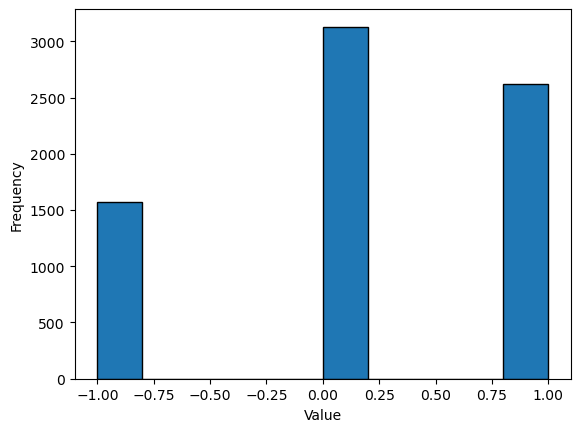

In [36]:
plt.hist(up_df['Sentiment'], bins=10, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Features and target variable
X = up_df['Sentence']
y = up_df['Sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit on training data
X_train_transformed = vectorizer.fit_transform(X_train)

# Transform test data using the same vectorizer
X_test_transformed = vectorizer.transform(X_test)

### KNN

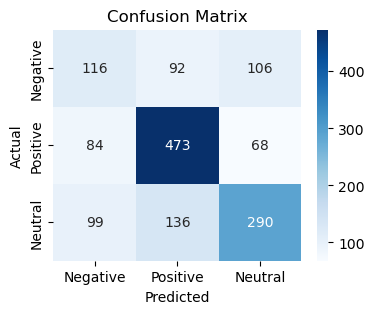

Accuracy: 0.6004098360655737
Classification Report:
               precision    recall  f1-score   support

          -1       0.39      0.37      0.38       314
           0       0.67      0.76      0.71       625
           1       0.62      0.55      0.59       525

    accuracy                           0.60      1464
   macro avg       0.56      0.56      0.56      1464
weighted avg       0.60      0.60      0.60      1464



In [38]:
knn = KNeighborsClassifier()

# Fit the classifier on the training data
knn.fit(X_train_transformed, y_train)


# Make predictions on the test set
y_pred = knn.predict(X_test_transformed)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

### Decision Tree Classifier

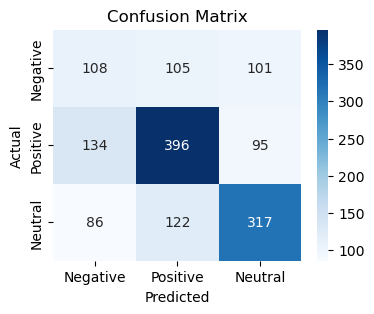

Accuracy: 0.5607923497267759
Classification Report:
               precision    recall  f1-score   support

          -1       0.33      0.34      0.34       314
           0       0.64      0.63      0.63       625
           1       0.62      0.60      0.61       525

    accuracy                           0.56      1464
   macro avg       0.53      0.53      0.53      1464
weighted avg       0.56      0.56      0.56      1464



In [39]:
clf = DecisionTreeClassifier()
clf.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

### SVM

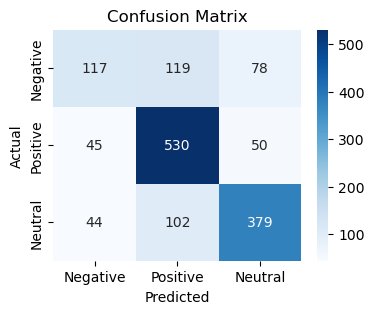

Accuracy: 0.7008196721311475
Classification Report:
               precision    recall  f1-score   support

          -1       0.57      0.37      0.45       314
           0       0.71      0.85      0.77       625
           1       0.75      0.72      0.73       525

    accuracy                           0.70      1464
   macro avg       0.67      0.65      0.65      1464
weighted avg       0.69      0.70      0.69      1464



In [40]:
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

### Logistic Regression

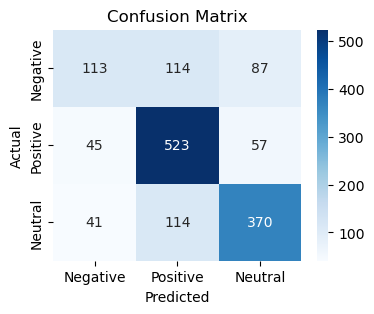

Accuracy: 0.6871584699453552
Classification Report:
               precision    recall  f1-score   support

          -1       0.57      0.36      0.44       314
           0       0.70      0.84      0.76       625
           1       0.72      0.70      0.71       525

    accuracy                           0.69      1464
   macro avg       0.66      0.63      0.64      1464
weighted avg       0.68      0.69      0.67      1464



In [41]:
log_reg = LogisticRegression()
log_reg.fit(X_train_transformed, y_train)

y_pred = log_reg.predict(X_test_transformed)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

## Preprocessing Upsampled Data

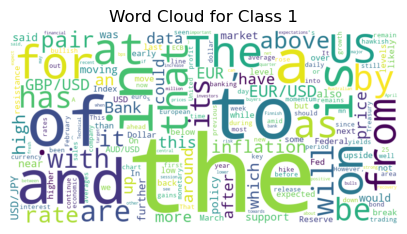

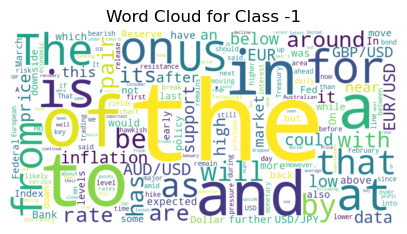

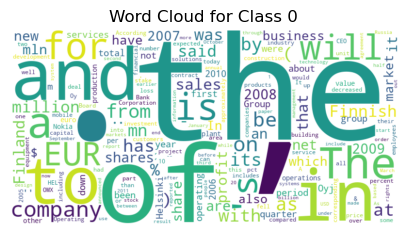

In [42]:
def plot_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data)
    plt.figure(figsize=(5, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

for label in up_df['Sentiment'].unique():
    words = ' '.join(up_df[up_df['Sentiment'] == label]['Sentence']).split()
    word_freq = Counter(words)
    plot_wordcloud(word_freq, f'Word Cloud for Class {label}')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


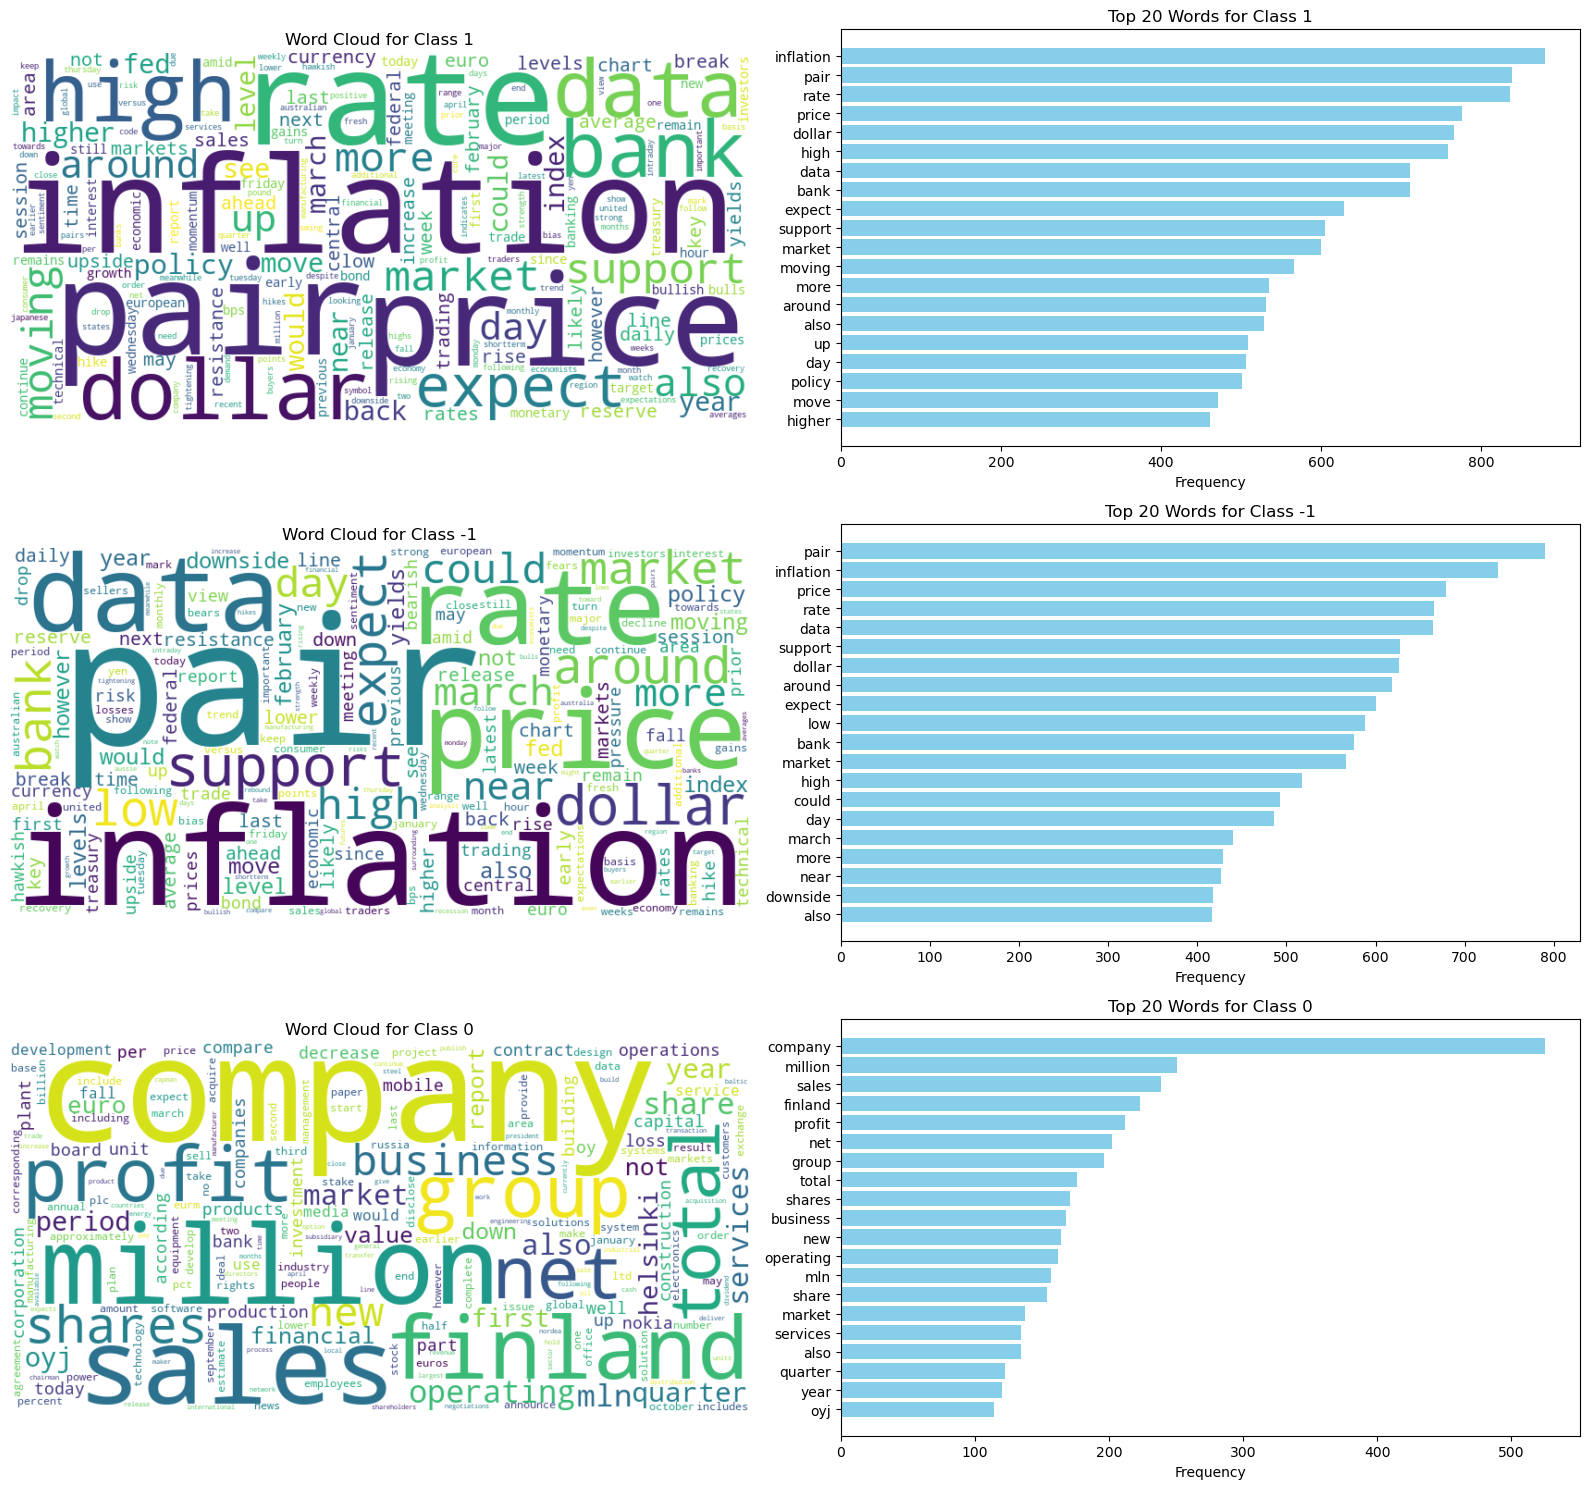

In [43]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Define stopwords and additional irrelevant words
exclude_words = {"up", "down", "few", "more", "no", "nor", "not"}
stop_words = set(stopwords.words('english')).union({"said", "EU", "mn", '$', '%', 'eur', 'finlad', 'finnish', '(', ')'})
stop_words -= exclude_words

def remove_stopwords(sentence):
    words = word_tokenize(sentence)
    filtered_sentence = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_sentence)

def remove_irrelevants(sentence):
    # Remove URLs
    sentence = re.compile(r'https?://\S+|www\.\S+').sub('', sentence)
    # Convert to lowercase
    sentence = sentence.lower()
    # Remove non-alphabetic characters (optional)
    sentence = re.sub(r'[^a-z\s]', '', sentence)
    return sentence

def preprocess_sentence(sentence):
    if isinstance(sentence, str):  # Only process strings
        sentence = remove_irrelevants(sentence)
        sentence = remove_stopwords(sentence)
        sentence = convert_past_to_present(sentence)  # Convert verbs to present tense
    return sentence

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

def convert_past_to_present(sentence):
    doc = nlp(sentence)
    present_sentence = []

    for token in doc:
        if token.pos_ == 'VERB':
            # Get the lemma (base form of the verb) which often is the present tense form
            lemma = token.lemma_
            if token.tag_ in ['VBD', 'VBN']:  # Past tense and past participle tags
                present_sentence.append(lemma)
            else:
                present_sentence.append(token.text)
        else:
            present_sentence.append(token.text)

    return " ".join(present_sentence)

# Assuming df is your DataFrame and it contains 'Sentence' and 'Sentiment' columns
up_df['Sentence'] = up_df['Sentence'].astype(str).apply(preprocess_sentence)

# Function to plot word cloud (you need to have wordcloud and matplotlib installed)
def plot_wordcloud(word_freq, title, ax):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title)
    ax.axis('off')

# Function to plot top 20 words bar chart
def plot_top_words(word_freq, title, ax):
    top_words = word_freq.most_common(20)
    words, counts = zip(*top_words)
    ax.barh(words, counts, color='skyblue')
    ax.set_xlabel('Frequency')
    ax.set_title(title)
    ax.invert_yaxis()  # Invert y-axis to have the most frequent words on top

# Number of unique sentiments
unique_labels = up_df['Sentiment'].unique()
num_labels = len(unique_labels)

# Create subplots: 2 columns (word clouds and bar charts) and as many rows as unique labels
fig, axes = plt.subplots(nrows=num_labels, ncols=2, figsize=(16, 5 * num_labels))

for idx, label in enumerate(unique_labels):
    words = ' '.join(up_df[up_df['Sentiment'] == label]['Sentence']).split()
    word_freq = Counter(words)

    # Plot word cloud
    plot_wordcloud(word_freq, f'Word Cloud for Class {label}', axes[idx, 0])

    # Plot top 20 words bar chart
    plot_top_words(word_freq, f'Top 20 Words for Class {label}', axes[idx, 1])

plt.tight_layout()
plt.show()


In [44]:
up_df.to_csv('cleaned_data_augmented_preprocessed.csv', index=False)

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Features and target variable
X = up_df['Sentence']
y = up_df['Sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit on training data
X_train_transformed = vectorizer.fit_transform(X_train)

# Transform test data using the same vectorizer
X_test_transformed = vectorizer.transform(X_test)

### KNN

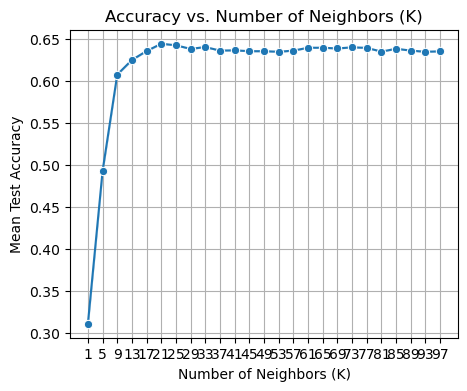

In [46]:
# Define the parameter grid for GridSearchCV with n_neighbors up to 100 in steps of 4
param_grid = {
    'n_neighbors': list(range(1, 101, 4)),  # Testing from 1 to 100 in steps of 4
    'algorithm': ['auto', 'brute']  # Different algorithms to test
}

# Initialize GridSearchCV with KNN model and parameter grid
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search.fit(X_train_transformed, y_train)

# Extract results for plotting
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']
param_n_neighbors = results['param_n_neighbors']

# Plot accuracy vs. n_neighbors
plt.figure(figsize=(5, 4))
sns.lineplot(x=param_n_neighbors, y=mean_test_scores, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Test Accuracy')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.grid(True)
plt.xticks(np.arange(min(param_n_neighbors), max(param_n_neighbors)+1, 4))  # Set x-ticks to match steps
plt.show()


Best Parameters: 31, auto
Best Cross-Validation Accuracy: 0.6416
Classification Report:
               precision    recall  f1-score   support

          -1       0.61      0.28      0.39       314
           0       0.66      0.84      0.74       625
           1       0.62      0.62      0.62       525

    accuracy                           0.64      1464
   macro avg       0.63      0.58      0.58      1464
weighted avg       0.63      0.64      0.62      1464



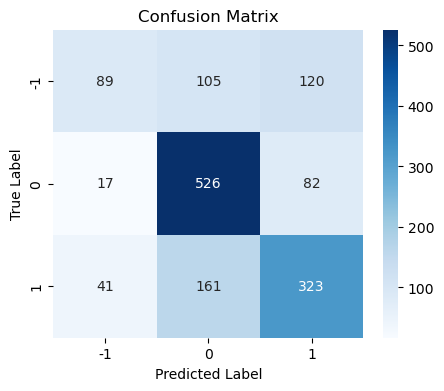

In [47]:

param_grid = {
    'n_neighbors': [31, 33, 35],  # Range of K values to test
    'algorithm': ['auto', 'brute']  # Different algorithms to test
}

# Initialize GridSearchCV with KNN model and parameter grid
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search.fit(X_train_transformed, y_train)

# Get the best K value and the corresponding accuracy
best_k = grid_search.best_params_['n_neighbors']
best_algorithm = grid_search.best_params_['algorithm']
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_k}, {best_algorithm}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.4f}")

# Evaluate the best model on the test set
best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(X_test_transformed)

print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Decision Tree Classifier

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\USER\anaconda3\Lib\site-packages\sk

Best Parameters: {'max_depth': 70, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 75}
Cross-validation results saved to cross_validation_results.csv
Accuracy: 0.6311
Classification Report:
               precision    recall  f1-score   support

          -1       0.47      0.38      0.42       314
           0       0.65      0.79      0.71       625
           1       0.68      0.60      0.64       525

    accuracy                           0.63      1464
   macro avg       0.60      0.59      0.59      1464
weighted avg       0.62      0.63      0.62      1464



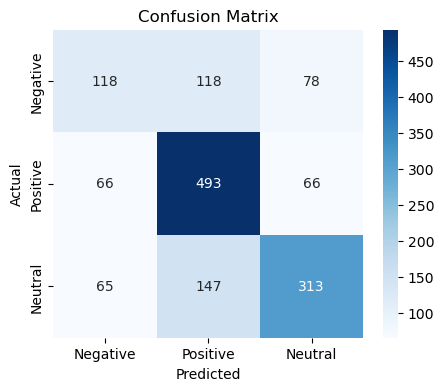

In [48]:
clf = DecisionTreeClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [70, 75, 80],
    'min_samples_split': [70, 75, 80],
    'min_samples_leaf': [1, 2, 5, 7],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on training data
grid_search.fit(X_train_transformed, y_train)

# Get the best estimator
best_clf = grid_search.best_estimator_

# Print the parameters of the best estimator
print("Best Parameters:", grid_search.best_params_)

# Perform cross-validation with the best estimator
cv_results = cross_val_score(best_clf, X_train_transformed, y_train, cv=5, scoring='accuracy')

# Collect cross-validation results
cv_data = {
    'Fold': range(1, len(cv_results) + 1),
    'Accuracy': cv_results
}

# Convert to DataFrame
df_cv_results = pd.DataFrame(cv_data)

# Save to CSV
df_cv_results.to_csv('cross_validation_results.csv', index=False)
print("Cross-validation results saved to cross_validation_results.csv")

# Make predictions on the test data
y_pred = best_clf.predict(X_test_transformed)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### SVM

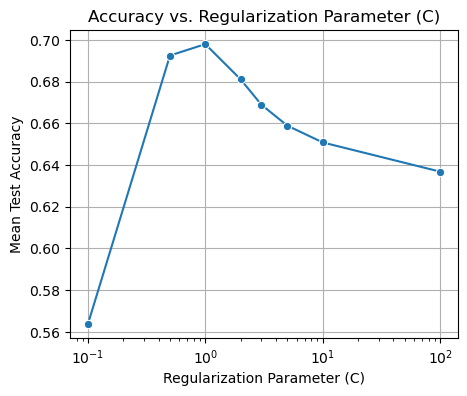

              precision    recall  f1-score   support

          -1       0.55      0.37      0.44       314
           0       0.68      0.85      0.76       625
           1       0.76      0.69      0.72       525

    accuracy                           0.69      1464
   macro avg       0.66      0.63      0.64      1464
weighted avg       0.68      0.69      0.68      1464



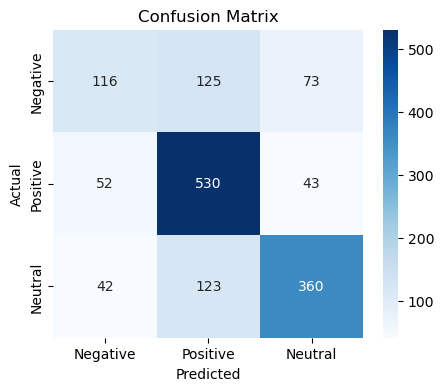

In [49]:
param_grid = {
    'C': [0.1, 0.5, 1, 2, 3, 5, 10, 100],  # Regularization parameter
    'kernel': ['linear']  # Kernel type to use
}

# Initialize GridSearchCV with SVM model and parameter grid
grid_search = GridSearchCV(SVC(), param_grid, cv=4, scoring='accuracy', return_train_score=True)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_transformed, y_train)

# Extract the results into a DataFrame
results = grid_search.cv_results_

# Plot accuracy vs. regularization parameter (C)
plt.figure(figsize=(5, 4))
sns.lineplot(x=results['param_C'], y=results['mean_test_score'], marker='o')
plt.xscale('log')  # Log scale for better visualization
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Mean Test Accuracy')
plt.title('Accuracy vs. Regularization Parameter (C)')
plt.grid(True)
plt.show()

# Get the best estimator and evaluate it
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_transformed)
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Logistic Regression

Best Parameters: {'max_iter': 100}
Best Cross-Validation Accuracy: 0.6947
Classification Report:
               precision    recall  f1-score   support

          -1       0.57      0.35      0.43       314
           0       0.68      0.85      0.76       625
           1       0.74      0.70      0.72       525

    accuracy                           0.69      1464
   macro avg       0.67      0.63      0.64      1464
weighted avg       0.68      0.69      0.67      1464



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


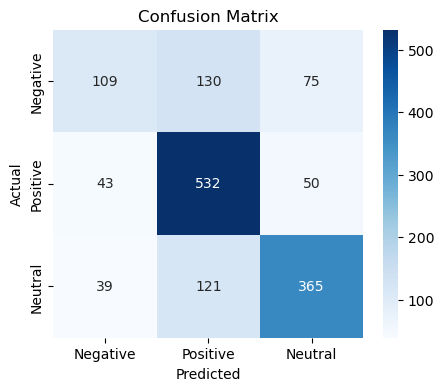

In [50]:
# Define the parameter grid for GridSearchCV
param_grid = [
    {
    'max_iter' : [100, 1000, 2500, 5000]
    }
]

# Initialize GridSearchCV with Logistic Regression model and parameter grid
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_transformed, y_train)

best_accuracy = grid_search.best_score_

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.4f}")

# Evaluate the best model on the test set
best_logreg_model = grid_search.best_estimator_
y_pred = best_logreg_model.predict(X_test_transformed)

print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Trying RNN

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
from sklearn.preprocessing import StandardScaler
import numpy as np

np.random.seed(42)

# Convert labels to categorical
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

X_train_tfidf = X_train_transformed.toarray()
X_test_tfidf = X_test_transformed.toarray()

# Normalize the data
scaler = StandardScaler()
X_train_tfidf = scaler.fit_transform(X_train_tfidf)
X_test_tfidf = scaler.transform(X_test_tfidf)

# Pad sequences to ensure uniform input size
max_len = X_train_tfidf.shape[1]
X_train_padded = pad_sequences(X_train_tfidf, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_tfidf, maxlen=max_len, padding='post')

# Build the Feedforward Neural Network Model
model = Sequential()
model.add(Dense(128, input_shape=(max_len,), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 output classes

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

# Train the Model
history = model.fit(X_train_padded, y_train_cat, epochs=100, batch_size=32, validation_data=(X_test_padded, y_test_cat), callbacks=[early_stopping, reduce_lr])

# Evaluate the Model
loss, accuracy = model.evaluate(X_test_padded, y_test_cat)
print(f'Test Accuracy: {accuracy}')





Epoch 1/100


183/183 [==============================] - 7s 24ms/step - loss: 3.2386 - accuracy: 0.4325 - val_loss: 3.2222 - val_accuracy: 0.5683 - lr: 0.0010
Epoch 2/100
183/183 [==============================] - 4s 23ms/step - loss: 3.3106 - accuracy: 0.5181 - val_loss: 3.1270 - val_accuracy: 0.5915 - lr: 0.0010
Epoch 3/100
183/183 [==============================] - 4s 23ms/step - loss: 2.9233 - accuracy: 0.6156 - val_loss: 2.8366 - val_accuracy: 0.5943 - lr: 0.0010
Epoch 4/100
183/183 [==============================] - 4s 23ms/step - loss: 2.4975 - accuracy: 0.6942 - val_loss: 2.5571 - val_accuracy: 0.6031 - lr: 0.0010
Epoch 5/100
183/183 [==============================] - 4s 23ms/step - loss: 2.1337 - accuracy: 0.7482 - val_loss: 2.3676 - val_accuracy: 0.6161 - lr: 0.0010
Epoch 6/100
183/183 [==============================] - 4s 23ms/step - loss: 1.9508 - accuracy: 0.7856 - val_loss: 2.3910 - val_accuracy: 0.6120 - lr: 0.0010
Epoch 7/100
183/183 [==============================] 

183/183 [==============================] - 4s 23ms/step - loss: 0.3855 - accuracy: 0.9183 - val_loss: 1.5655 - val_accuracy: 0.6236 - lr: 1.0000e-05
Epoch 46/100
183/183 [==============================] - 4s 23ms/step - loss: 0.3856 - accuracy: 0.9180 - val_loss: 1.5738 - val_accuracy: 0.6223 - lr: 1.0000e-05
Epoch 47/100
183/183 [==============================] - 4s 22ms/step - loss: 0.3724 - accuracy: 0.9194 - val_loss: 1.5784 - val_accuracy: 0.6230 - lr: 1.0000e-05
Epoch 48/100
46/46 [==============================] - 0s 4ms/step - loss: 1.5485 - accuracy: 0.6223
Test Accuracy: 0.6222677826881409
